<a href="https://colab.research.google.com/github/wizard339/education/blob/main/word2vec_properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# И так, давайте посмотрим на применение Word2Vec
## Для этого воспользуемся модулем Gensim

In [1]:
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-01-28 18:21:37--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-01-28 18:21:38--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  4.73MB/s    in 2m 49s  

2023-01-28 18:24:28 (4.85 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

In [2]:
import numpy as np

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors, translation_matrix
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Gensim - модуль для моделирования схожести текста и слов, и не совсем является инструментом deep learning. Однако для наших целей визуализации свойств Word2Vec подходит идеально

Мы воспользуемся готовым набором вектором, который мы скачали ранее

In [3]:
path = '/content/glove.6B.100d.txt'
glove_file = datapath(path)
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [4]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

Теперь мы можем исследовать нашу модель. Давайте начнем с простого - с поиска похожих по смыслу векторов.

In [5]:
model.most_similar("teacher")

[('student', 0.8083398938179016),
 ('school', 0.75455641746521),
 ('teaching', 0.7521439790725708),
 ('taught', 0.7411845922470093),
 ('teachers', 0.7291542887687683),
 ('graduate', 0.7134960293769836),
 ('instructor', 0.7077120542526245),
 ('students', 0.6828974485397339),
 ('teaches', 0.6552315950393677),
 ('education', 0.6528990268707275)]

In [6]:
model.most_similar("tolstoy")

[('dostoyevsky', 0.7424925565719604),
 ('turgenev', 0.7075358033180237),
 ('dostoevsky', 0.66252201795578),
 ('kafka', 0.6395877599716187),
 ('chekhov', 0.6364997029304504),
 ('pushkin', 0.6059387922286987),
 ('karenina', 0.5865063667297363),
 ('nietzsche', 0.5751049518585205),
 ('dracula', 0.56833815574646),
 ('dickens', 0.5477893352508545)]

Можно также отобразить "облако" слов на одном графике 

PCA - principal component analysis - один из способов уменьшить размерность данных, потеряв при этом наименьшее количество информации

In [7]:
def show_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        words = np.random.choice(list(model.vocab.keys()), sample) if sample > 0 else [word for word in model.vocab]
        
    word_vectors = np.array([model[w] for w in words])
    
    dim_reduction = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10,10))
    plot = sns.scatterplot(x=dim_reduction[:,0], y=dim_reduction[:,1])
    for word, (x,y) in zip(words, dim_reduction):
        plot.text(x+0.05, y+0.05, word)

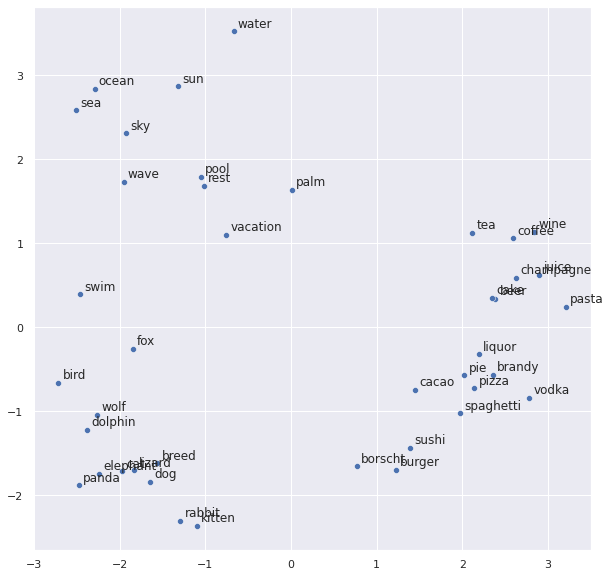

In [8]:
show_pca_scatterplot(model, 
                     ['dog', 'cat', 'kitten' , 'lizard', 'wolf', 'bird', 'panda', 'elephant', 'breed', 'fox', 'rabbit',
                     'coffee', 'tea', 'juice', 'cacao', 'vodka', 'wine', 'beer', 'brandy', 'champagne', 'liquor',
                     'sea', 'vacation', 'dolphin', 'ocean', 'wave', 'swim', 'pool', 'rest', 'palm', 'sun', 'sky', 'water',
                     'pizza', 'pie', 'spaghetti', 'borscht', 'cake', 'burger', 'pasta', 'sushi'])

Можно так же взять рандомные слова из словаря и ограничить их количество с помощюю kwarg sample

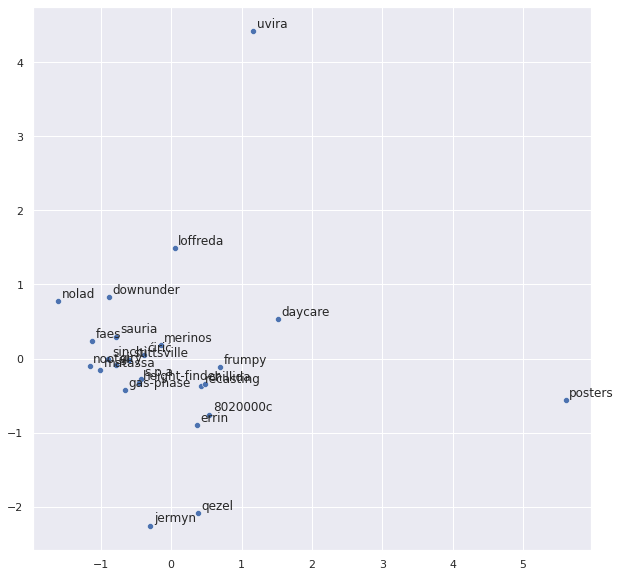

In [9]:
show_pca_scatterplot(model, sample=25)

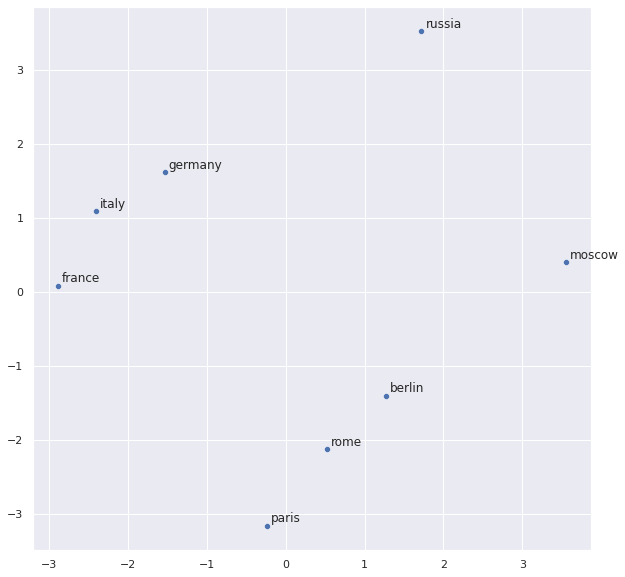

In [10]:
show_pca_scatterplot(model, 
                     ['rome', 'moscow', 'paris' , 'berlin', 'italy', 'russia', 'france', 'germany'])

Так выглядит поиск аналогий в Word2Vec

"Rome" - "Italy" + "China" = "Bejing"



In [11]:
result = model.most_similar(positive=['rome', 'china'], negative=['italy'])
print(f'{result[0][0]}: {round(result[0][1], 3)}')

beijing: 0.805


"King" -"Man" + "Woman" = "Queen"

![image.png](https://blog.acolyer.org/wp-content/uploads/2016/04/word2vec-king-queen-vectors.png)

[image source](https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/)

"Retell" - "Tell" + "Marry" 

In [12]:
result = model.most_similar(positive=['retell', 'marry'], negative=['tell'])
print(f'{result[0][0]}: {round(result[0][1], 3)}')

uncouple: 0.601


"Surgeon" - "Man" + "Woman" ~= "Nurse" 

“Cosmetics” - “Woman” + “Man” ~= “Pharmaceuticals”

“Feminism” - “Woman” + “Man” ~= “Conservatism”

“Computer programmer” - “Man” + “Woman” ~= “Homemaker”
